# Student

**Name**: Sina Beyrami

**Student ID**: 400105433

# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [57]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    W1 = 0.1 * np.random.randn(hidden_size, input_size)
    b1 = np.zeros((hidden_size, 1))
    W2 = 0.1 * np.random.randn(output_size, hidden_size)
    b2 = np.zeros((output_size, 1))

    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return parameters



TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [58]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return (x > 0).astype(float)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    s = sigmoid(x)
    return s * (1 - s)

TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [59]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = X.dot(W1.T) + b1.T
    A1 = relu(Z1)

    Z2 = A1.dot(W2.T) + b2.T
    A2 = sigmoid(Z2)

    cache = {
        "X": X,
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }

    return A2, cache

TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [60]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    epsilon = 1e-12
    y_pred_clipped = np.clip(y_pred, epsilon, 1.0 - epsilon)
    sample_losses = -np.sum(y_true * np.log(y_pred_clipped), axis=1)
    loss = np.mean(sample_losses)
    return loss

TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [61]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    X = cache["X"]
    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]

    m = X.shape[0]

    dZ2 = A2 - y_true

    dW2 = (dZ2.T @ A1) / m
    db2 = np.mean(dZ2, axis=0, keepdims=True).T

    dA1 = dZ2 @ W2
    dZ1 = dA1 * relu_derivative(Z1)

    dW1 = (dZ1.T @ X) / m
    db1 = np.mean(dZ1, axis=0, keepdims=True).T

    gradients = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return gradients

TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [62]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    parameters["W1"] -= learning_rate * gradients["dW1"]
    parameters["b1"] -= learning_rate * gradients["db1"]
    parameters["W2"] -= learning_rate * gradients["dW2"]
    parameters["b2"] -= learning_rate * gradients["db2"]

    return parameters

TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [63]:
# Training Loop
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    m = X_train.shape[0]
    input_size = X_train.shape[1] * X_train.shape[2]
    X_train_flat = X_train.reshape(m, input_size)

    output_size = 10
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    A2, cache = forward_propagation(X_train_flat, parameters)
    print(f"Epoch 0, Loss: {compute_loss(y_train, A2):.4f}")

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train_flat, parameters)

        loss = compute_loss(y_train, A2)

        gradients = backward_propagation(X_train_flat, y_train, parameters, cache)

        parameters = update_parameters(parameters, gradients, learning_rate=learning_rate)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

    return parameters

hidden_sizes = [32, 64, 128]
for i in hidden_sizes:
    print(f"Training with hidden layer size: {i}")
    train_model(x_train, y_train, i)
    print()

Training with hidden layer size: 32
Epoch 0, Loss: 1.0393
Epoch 10, Loss: 1.5980
Epoch 20, Loss: 1.9378
Epoch 30, Loss: 2.0246
Epoch 40, Loss: 2.0225
Epoch 50, Loss: 1.9921

Training with hidden layer size: 64
Epoch 0, Loss: 0.6256
Epoch 10, Loss: 1.4313
Epoch 20, Loss: 1.8438
Epoch 30, Loss: 1.9259
Epoch 40, Loss: 1.8977
Epoch 50, Loss: 1.8376

Training with hidden layer size: 128
Epoch 0, Loss: 0.9510
Epoch 10, Loss: 1.8679
Epoch 20, Loss: 1.8852
Epoch 30, Loss: 1.7751
Epoch 40, Loss: 1.6634
Epoch 50, Loss: 1.5665



TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [64]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {}
    s = {}

    for key in parameters.keys():
        v[key] = np.zeros_like(parameters[key])
        s[key] = np.zeros_like(parameters[key])

    t = 0
    return v, s, t

def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1

    for key in parameters.keys():
        v[key] = beta1 * v[key] + (1 - beta1) * gradients["d" + key]
        s[key] = beta2 * s[key] + (1 - beta2) * (gradients["d" + key] ** 2)

        v_corrected = v[key] / (1 - (beta1 ** t))
        s_corrected = s[key] / (1 - (beta2 ** t))

        parameters[key] = parameters[key] - learning_rate * (v_corrected / (np.sqrt(s_corrected) + epsilon))

    return parameters, v, s, t

TODO: Implement Adam optimizer into the training loop.

In [65]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    m = X_train.shape[0]
    input_size = X_train.shape[1] * X_train.shape[2]
    X_train_flat = X_train.reshape(m, input_size)

    output_size = 10
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    v, s, t = initialize_adam(parameters)

    A2, cache = forward_propagation(X_train_flat, parameters)
    print(f"Epoch 0, Loss: {compute_loss(y_train, A2):.4f}")

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train_flat, parameters)

        loss = compute_loss(y_train, A2)

        gradients = backward_propagation(X_train_flat, y_train, parameters, cache)

        parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t,
                                                          learning_rate=learning_rate)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

    return parameters

hidden_sizes = [32, 64, 128]
for i in hidden_sizes:
    print(f"Training with hidden layer size: {i}")
    train_model_with_adam(x_train, y_train, i)
    print()

Training with hidden layer size: 32
Epoch 0, Loss: 0.6881
Epoch 10, Loss: 1.1036
Epoch 20, Loss: 1.7679
Epoch 30, Loss: 1.9689
Epoch 40, Loss: 1.5922
Epoch 50, Loss: 1.3122

Training with hidden layer size: 64
Epoch 0, Loss: 0.8499
Epoch 10, Loss: 2.1312
Epoch 20, Loss: 2.1012
Epoch 30, Loss: 1.3114
Epoch 40, Loss: 1.0795
Epoch 50, Loss: 1.0017

Training with hidden layer size: 128
Epoch 0, Loss: 0.8749
Epoch 10, Loss: 1.9230
Epoch 20, Loss: 1.3825
Epoch 30, Loss: 0.9392
Epoch 40, Loss: 0.8626
Epoch 50, Loss: 0.8130



### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [66]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {}
    for key in parameters.keys():
        s[key] = np.zeros_like(parameters[key])
    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for key in parameters.keys():
        s[key] = beta * s[key] + (1 - beta) * (gradients["d" + key] ** 2)

        parameters[key] = parameters[key] - learning_rate * (gradients["d" + key] / (np.sqrt(s[key]) + epsilon))

    return parameters, s

TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [67]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """

    m = X_train.shape[0]
    input_size = X_train.shape[1] * X_train.shape[2]
    X_train_flat = X_train.reshape(m, input_size)

    output_size = 10
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    if optimizer == 'adam':
        v, s, t = initialize_adam(parameters)
    elif optimizer == 'rmsprop':
        s = initialize_rmsprop(parameters)
    else:
        raise ValueError("Optimizer must be 'adam' or 'rmsprop'.")

    loss_history = []

    A2, cache = forward_propagation(X_train_flat, parameters)
    print(f"Epoch 0, Loss: {compute_loss(y_train, A2):.4f}")

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train_flat, parameters)

        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        gradients = backward_propagation(X_train_flat, y_train, parameters, cache)

        if optimizer == 'adam':
            parameters, v, s, t = update_parameters_with_adam(
                parameters, gradients, v, s, t, learning_rate=learning_rate
            )
        elif optimizer == 'rmsprop':
            parameters, s = update_parameters_with_rmsprop(
                parameters, gradients, s, learning_rate=learning_rate
            )

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

    return loss_history

TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.

Training with Adam optimizer...
Epoch 0, Loss: 0.6780
Epoch 10, Loss: 1.5909
Epoch 20, Loss: 1.9205
Epoch 30, Loss: 1.3221
Epoch 40, Loss: 1.0482
Epoch 50, Loss: 0.9780
Epoch 0, Loss (adam): 0.6780
Epoch 10, Loss (adam): 1.7003
Epoch 20, Loss (adam): 1.8687
Epoch 30, Loss (adam): 1.2811
Epoch 40, Loss (adam): 1.0352

Training with RMSprop optimizer...
Epoch 0, Loss: 0.7288
Epoch 10, Loss: 1.4969
Epoch 20, Loss: 1.1446
Epoch 30, Loss: 1.1512
Epoch 40, Loss: 0.9939
Epoch 50, Loss: 0.9026
Epoch 0, Loss (rmsprop): 0.7288
Epoch 10, Loss (rmsprop): 1.4463
Epoch 20, Loss (rmsprop): 1.1212
Epoch 30, Loss (rmsprop): 0.8463
Epoch 40, Loss (rmsprop): 0.7811


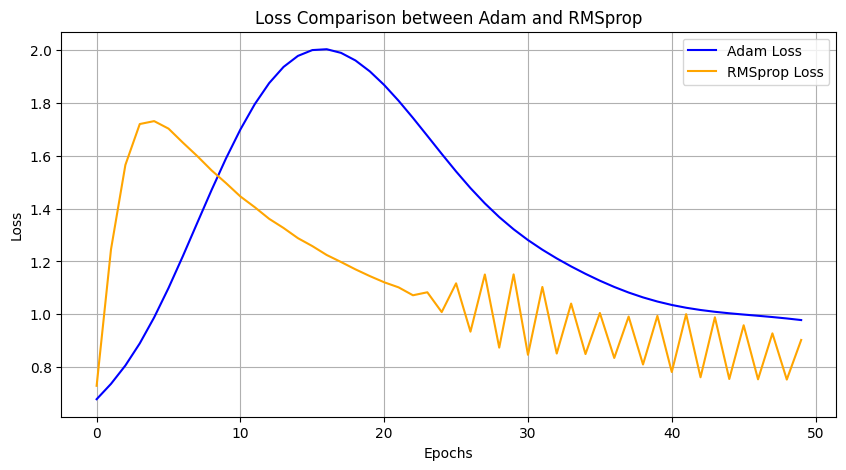

In [55]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    print("Training with Adam optimizer...")
    loss_history_adam = train_model(X_train, y_train, hidden_size=hidden_size, epochs=epochs, learning_rate=0.001, optimizer='adam')

#    for e in [0, 10, 20, 30, 40]:
#        if e < len(loss_history_adam):
#            print(f"Epoch {e}, Loss (adam): {loss_history_adam[e]:.4f}")

    print("\nTraining with RMSprop optimizer...")
    loss_history_rmsprop = train_model(X_train, y_train, hidden_size=hidden_size, epochs=epochs, learning_rate=0.001, optimizer='rmsprop')
    print()
#    for e in [0, 10, 20, 30, 40]:
#        if e < len(loss_history_rmsprop):
#            print(f"Epoch {e}, Loss (rmsprop): {loss_history_rmsprop[e]:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(loss_history_adam, label='Adam Loss', color='blue')
    plt.plot(loss_history_rmsprop, label='RMSprop Loss', color='orange')
    plt.title('Loss Comparison between Adam and RMSprop')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

compare_optimizers(x_train, y_train, 64)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [80]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters.keys():
        parameters[key] = parameters[key] - learning_rate * gradients["d" + key]

    return parameters

2. Modify the Training Loop


In [81]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    m = X_train.shape[0]
    input_size = X_train.shape[1] * X_train.shape[2]
    X_train_flat = X_train.reshape(m, input_size)

    output_size = 10
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    loss_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train_flat, parameters)

        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        gradients = backward_propagation(X_train_flat, y_train, parameters, cache)

        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate=learning_rate)

#        if (epoch + 1) % 10 == 0:
#            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

    return loss_history

3. Experiment with Different Learning Rates



Training with learning rate: 0.001
Epoch 0, Loss (learning rate 0.001): 0.7094
Epoch 10, Loss (learning rate 0.001): 0.7926
Epoch 20, Loss (learning rate 0.001): 0.8742
Epoch 30, Loss (learning rate 0.001): 0.9553
Epoch 40, Loss (learning rate 0.001): 1.0359

Training with learning rate: 0.01
Epoch 0, Loss (learning rate 0.01): 0.6956
Epoch 10, Loss (learning rate 0.01): 1.5365
Epoch 20, Loss (learning rate 0.01): 1.8702
Epoch 30, Loss (learning rate 0.01): 1.9200
Epoch 40, Loss (learning rate 0.01): 1.8796

Training with learning rate: 0.1
Epoch 0, Loss (learning rate 0.1): 0.9623
Epoch 10, Loss (learning rate 0.1): 1.5007
Epoch 20, Loss (learning rate 0.1): 1.1723
Epoch 30, Loss (learning rate 0.1): 1.0270
Epoch 40, Loss (learning rate 0.1): 0.9502


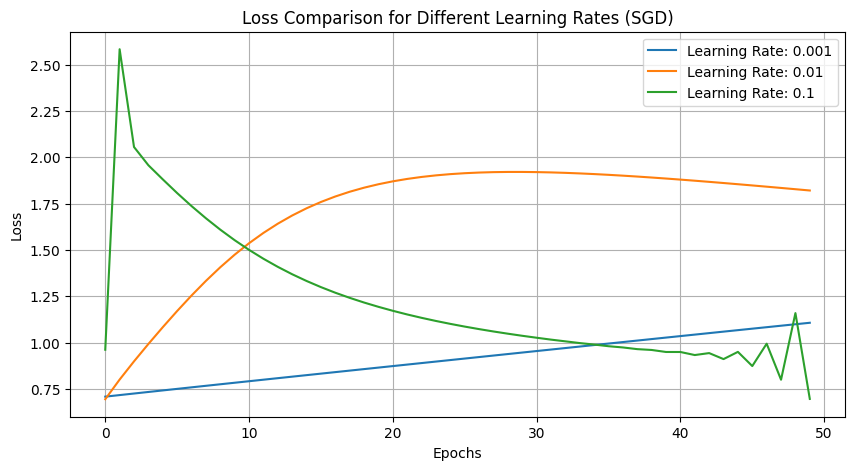

In [84]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    plt.figure(figsize=(10, 5))

    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}")
        loss_history = train_model_with_sgd(X_train, y_train, hidden_size=hidden_size,
                                            epochs=epochs, learning_rate=lr)

        for e in [0, 10, 20, 30, 40]:
            if e < len(loss_history):
                print(f"Epoch {e}, Loss (learning rate {lr}): {loss_history[e]:.4f}")

        plt.plot(loss_history, label=f'Learning Rate: {lr}')

    plt.title('Loss Comparison for Different Learning Rates (SGD)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

compare_learning_rates(x_train, y_train, hidden_size=64, epochs=50, learning_rates=[0.001, 0.01, 0.1])

### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [82]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {}
    for key in parameters.keys():
        v[key] = np.zeros_like(parameters[key])
    return v

def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    for key in parameters.keys():
        v[key] = beta * v[key] + (1 - beta) * gradients["d" + key]
        parameters[key] -= learning_rate * v[key]

    return parameters, v

3. Modify the Training Loop


In [83]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """

    m = X_train.shape[0]
    input_size = X_train.shape[1] * X_train.shape[2]
    X_train_flat = X_train.reshape(m, input_size)

    output_size = 10
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    if optimizer == 'momentum':
        v = initialize_momentum(parameters)
    else:
        v = None

    loss_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train_flat, parameters)

        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        gradients = backward_propagation(X_train_flat, y_train, parameters, cache)

        if optimizer == 'sgd':
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate=learning_rate)
        elif optimizer == 'momentum':
            parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate=learning_rate, beta=0.9)
        else:
            raise ValueError("Optimizer must be 'sgd' or 'momentum'.")

#        if (epoch + 1) % 10 == 0:
#            print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

    return loss_history

4. Train the Model with Both Optimizers


Training with Classic SGD...
Epoch 0, Loss (sgd): 0.7779
Epoch 10, Loss (sgd): 1.5362
Epoch 20, Loss (sgd): 1.8294
Epoch 30, Loss (sgd): 1.8565
Epoch 40, Loss (sgd): 1.8036

Training with SGD with Momentum...
Epoch 0, Loss (momentum): 0.8777
Epoch 10, Loss (momentum): 1.2383
Epoch 20, Loss (momentum): 1.9930
Epoch 30, Loss (momentum): 2.3985
Epoch 40, Loss (momentum): 2.2808


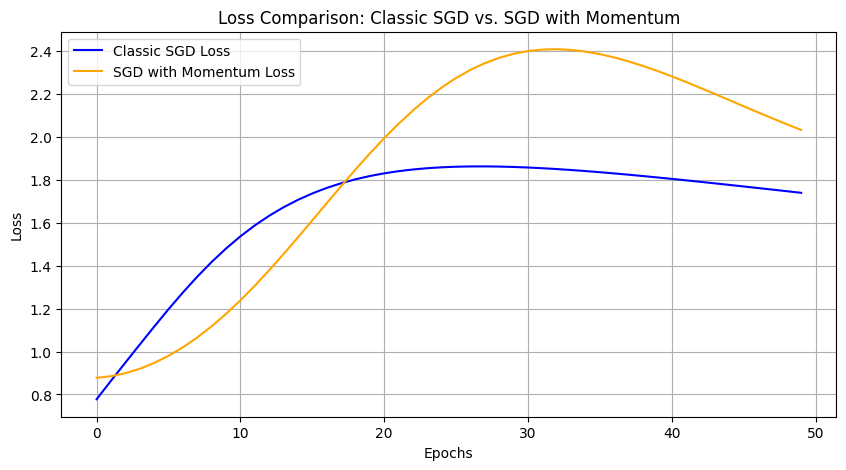

In [73]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """

    print("Training with Classic SGD...")
    loss_sgd = train_model(X_train, y_train, hidden_size=hidden_size,
                           epochs=epochs, learning_rate=0.01, optimizer='sgd')

    for e in [0, 10, 20, 30, 40]:
        if e < len(loss_sgd):
            print(f"Epoch {e}, Loss (sgd): {loss_sgd[e]:.4f}")

    print("\nTraining with SGD with Momentum...")
    loss_momentum = train_model(X_train, y_train, hidden_size=hidden_size,
                                epochs=epochs, learning_rate=0.01, optimizer='momentum')

    for e in [0, 10, 20, 30, 40]:
        if e < len(loss_momentum):
            print(f"Epoch {e}, Loss (momentum): {loss_momentum[e]:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(loss_sgd, label='Classic SGD Loss', color='blue')
    plt.plot(loss_momentum, label='SGD with Momentum Loss', color='orange')
    plt.title('Loss Comparison: Classic SGD vs. SGD with Momentum')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

compare_sgd_and_momentum(x_train, y_train, 64)

## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [87]:
def compute_accuracy(y_true, y_pred):
    """
    Compute accuracy given one-hot encoded y_true and probabilities y_pred.
    """
    y_true_class = np.argmax(y_true, axis=1)
    y_pred_class = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_true_class == y_pred_class)
    return accuracy

def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    m = X_train.shape[0]
    input_size = X_train.shape[1] * X_train.shape[2]
    X_train_flat = X_train.reshape(m, input_size)

    output_size = 10
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        permutation = np.random.permutation(m)
        X_shuffled = X_train_flat[permutation]
        y_shuffled = y_train[permutation]

        epoch_loss = 0.0
        epoch_acc = 0.0
        num_batches = int(np.ceil(m / batch_size))

        for i in range(num_batches):
            start = i * batch_size
            end = min(start + batch_size, m)
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            A2, cache = forward_propagation(X_batch, parameters)

            batch_loss = compute_loss(y_batch, A2)
            batch_acc = compute_accuracy(y_batch, A2)

            gradients = backward_propagation(X_batch, y_batch, parameters, cache)

            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate=learning_rate)

            epoch_loss += batch_loss
            epoch_acc += batch_acc

        epoch_loss /= num_batches
        epoch_acc /= num_batches

        loss_history.append(epoch_loss)
        accuracy_history.append(epoch_acc)

#        if (epoch + 1) % 10 == 0:
#           print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    return loss_history, accuracy_history

2. Train the Model with Different Mini-Batch Sizes


In [88]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """

    selected_epochs = [0, 10, 20, 30, 40]

    for bs in batch_sizes:
        print(f"\nTraining with mini-batch size: {bs}")
        loss_history, accuracy_history = train_model_with_mini_batches(
            X_train, y_train, hidden_size=hidden_size, epochs=epochs, learning_rate=0.01, batch_size=bs
        )

        for e in selected_epochs:
            if e < len(loss_history):
                print(f"Epoch {e}, Loss: {loss_history[e]:.4f}, Accuracy: {accuracy_history[e]:.4f}")

        final_loss = loss_history[-1]
        final_accuracy = accuracy_history[-1]
        print(f"Final Loss for batch size {bs}: {final_loss:.4f}")
        print(f"Final Accuracy for batch size {bs}: {final_accuracy:.4f}")

compare_mini_batch_sizes(x_train, y_train, 64)


Training with mini-batch size: 16
Epoch 0, Loss: 0.7260, Accuracy: 0.7528
Epoch 10, Loss: 0.3632, Accuracy: 0.8790
Epoch 20, Loss: 0.3143, Accuracy: 0.8930
Epoch 30, Loss: 0.2850, Accuracy: 0.9024
Epoch 40, Loss: 0.2633, Accuracy: 0.9102
Final Loss for batch size 16: 0.2482
Final Accuracy for batch size 16: 0.9174

Training with mini-batch size: 32
Epoch 0, Loss: 0.8389, Accuracy: 0.7171
Epoch 10, Loss: 0.4153, Accuracy: 0.8636
Epoch 20, Loss: 0.3600, Accuracy: 0.8792
Epoch 30, Loss: 0.3277, Accuracy: 0.8900
Epoch 40, Loss: 0.3051, Accuracy: 0.8976
Final Loss for batch size 32: 0.2894
Final Accuracy for batch size 32: 0.9024

Training with mini-batch size: 64
Epoch 0, Loss: 1.0212, Accuracy: 0.6411
Epoch 10, Loss: 0.4720, Accuracy: 0.8467
Epoch 20, Loss: 0.4188, Accuracy: 0.8630
Epoch 30, Loss: 0.3864, Accuracy: 0.8720
Epoch 40, Loss: 0.3621, Accuracy: 0.8790
Final Loss for batch size 64: 0.3455
Final Accuracy for batch size 64: 0.8846


### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [90]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    m = X_train.shape[0]
    input_size = X_train.shape[1] * X_train.shape[2]
    X_train_flat = X_train.reshape(m, input_size)

    output_size = 10
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train_flat, parameters)

        loss = compute_loss(y_train, A2)
        acc = compute_accuracy(y_train, A2)

        loss_history.append(loss)
        accuracy_history.append(acc)

        gradients = backward_propagation(X_train_flat, y_train, parameters, cache)

        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate=learning_rate)

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

    return loss_history, accuracy_history

In [92]:
import time

def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """

    selected_epochs = [0, 10, 20, 30, 40]

    print("Training with Mini-Batch Gradient Descent...")
    start_time = time.time()
    mini_loss_history, mini_accuracy_history = train_model_with_mini_batches(
        X_train, y_train, hidden_size=hidden_size, epochs=epochs, learning_rate=0.01, batch_size=batch_size
    )
    mini_time = time.time() - start_time

    for e in selected_epochs:
        if e < len(mini_loss_history):
            print(f"Epoch {e}, Loss: {mini_loss_history[e]:.4f}, Accuracy: {mini_accuracy_history[e]:.4f}")

    mini_final_loss = mini_loss_history[-1]
    mini_final_acc = mini_accuracy_history[-1]

    print("\nTraining with Full-Batch Gradient Descent...")
    start_time = time.time()
    full_loss_history, full_accuracy_history = train_model_full_batch(
        X_train, y_train, hidden_size=hidden_size, epochs=epochs, learning_rate=0.01
    )
    full_time = time.time() - start_time

    for e in selected_epochs:
        if e < len(full_loss_history):
            print(f"Epoch {e}, Loss (Full-Batch): {full_loss_history[e]:.4f}, Accuracy: {full_accuracy_history[e]:.4f}")

    full_final_loss = full_loss_history[-1]
    full_final_acc = full_accuracy_history[-1]

    print(f"\nMini-Batch Final Loss: {mini_final_loss:.4f}, Final Accuracy: {mini_final_acc:.4f}, Time: {mini_time:.2f} seconds")
    print(f"Full-Batch Final Loss: {full_final_loss:.4f}, Final Accuracy: {full_final_acc:.4f}, Time: {full_time:.2f} seconds")


compare_mini_batch_and_full_batch(x_train, y_train, 64)

Training with Mini-Batch Gradient Descent...
Epoch 0, Loss: 0.8723, Accuracy: 0.7040
Epoch 10, Loss: 0.4142, Accuracy: 0.8618
Epoch 20, Loss: 0.3619, Accuracy: 0.8792
Epoch 30, Loss: 0.3314, Accuracy: 0.8901
Epoch 40, Loss: 0.3097, Accuracy: 0.8956

Training with Full-Batch Gradient Descent...
Epoch 10/50, Loss: 1.7569, Accuracy: 0.1242
Epoch 20/50, Loss: 1.9677, Accuracy: 0.2077
Epoch 30/50, Loss: 1.9684, Accuracy: 0.2743
Epoch 40/50, Loss: 1.9119, Accuracy: 0.3388
Epoch 50/50, Loss: 1.8421, Accuracy: 0.3950
Epoch 0, Loss (Full-Batch): 1.0681, Accuracy: 0.0537
Epoch 10, Loss (Full-Batch): 1.7967, Accuracy: 0.1336
Epoch 20, Loss (Full-Batch): 1.9732, Accuracy: 0.2145
Epoch 30, Loss (Full-Batch): 1.9642, Accuracy: 0.2817
Epoch 40, Loss (Full-Batch): 1.9052, Accuracy: 0.3448

Mini-Batch Final Loss: 0.2939, Final Accuracy: 0.9006, Time: 115.58 seconds
Full-Batch Final Loss: 1.8421, Final Accuracy: 0.3950, Time: 40.78 seconds
